## Summarization with HuggingFace and BART

Summarization in Natural Language Processing (NLP) involves the automatic generation of concise and coherent summaries from longer texts or documents.


<img src= "https://frenzy86.s3.eu-west-2.amazonaws.com/python/nlp/nlp4.1.jpg" width=1000>


In [1]:
!pip install -U transformers -q
!pip install -U accelerate -q
!pip install -U datasets -q
!pip install -U bertviz -q
!pip install -U umap-learn -q
!pip install -U sentencepiece -q
!pip install -U urllib3 -q
!pip install -U py7zr -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 1.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 39.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 29.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 471.6/471.6 kB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.9/39.9 MB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 7.4 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pyarrow<15.0.0a0,>=14.0.1, but you have pyarrow 17.0.0 which is incompatible.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 157.6/157.6 kB 5.2 MB/s eta 0:00:00
   ━━━━━━

In [ ]:
# The CNN/DailyMail Dataset
# The CNN/DailyMail dataset consists of around 300,000 pairs of news articles and
# their corresponding summaries, composed from the bullet points that CNN and the
# DailyMail attach to their articles.
# summaries are abstractive and not extractive

In [2]:
import numpy as np
from datasets import load_dataset
from huggingface_hub import list_datasets

import warnings
warnings.filterwarnings('ignore')

all_datasets = [dataset.id for dataset in list_datasets()]
all_datasets

['amirveyseh/acronym_identification',
 'ade-benchmark-corpus/ade_corpus_v2',
 'UCLNLP/adversarial_qa',
 'Yale-LILY/aeslc',
 'nwu-ctext/afrikaans_ner_corpus',
 'fancyzhx/ag_news',
 'allenai/ai2_arc',
 'google/air_dialogue',
 'komari6/ajgt_twitter_ar',
 'legacy-datasets/allegro_reviews',
 'tblard/allocine',
 'mutiyama/alt',
 'fancyzhx/amazon_polarity',
 'defunct-datasets/amazon_reviews_multi',
 'defunct-datasets/amazon_us_reviews',
 'sewon/ambig_qa',
 'nala-cub/americas_nli',
 'legacy-datasets/ami',
 'gavinxing/amttl',
 'facebook/anli',
 'sealuzh/app_reviews',
 'deepmind/aqua_rat',
 'google-research-datasets/aquamuse',
 'bigIR/ar_cov19',
 'hadyelsahar/ar_res_reviews',
 'iabufarha/ar_sarcasm',
 'abuelkhair-corpus/arabic_billion_words',
 'QCRI/arabic_pos_dialect',
 'halabi2016/arabic_speech_corpus',
 'hsseinmz/arcd',
 'ramybaly/arsentd_lev',
 'allenai/art',
 'arxiv-community/arxiv_dataset',
 'tuanphong/ascent_kb',
 'achrafothman/aslg_pc12',
 'AmazonScience/asnq',
 'facebook/asset',
 'nilc-

In [3]:
len(all_datasets)

218964

In [4]:
dataset = load_dataset("cnn_dailymail", "3.0.0")
dataset['train']

README.md:   0%|          | 0.00/15.6k [00:00<?, ?B/s]

train-00000-of-00003.parquet:   0%|          | 0.00/257M [00:00<?, ?B/s]

train-00001-of-00003.parquet:   0%|          | 0.00/257M [00:00<?, ?B/s]

train-00002-of-00003.parquet:   0%|          | 0.00/259M [00:00<?, ?B/s]

validation-00000-of-00001.parquet:   0%|          | 0.00/34.7M [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/30.0M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/287113 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/13368 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/11490 [00:00<?, ? examples/s]

Dataset({
    features: ['article', 'highlights', 'id'],
    num_rows: 287113
})

In [5]:
dataset['train'][1]['article'][:300]

'Editor\'s note: In our Behind the Scenes series, CNN correspondents share their experiences in covering news and analyze the stories behind the events. Here, Soledad O\'Brien takes users inside a jail where many of the inmates are mentally ill. An inmate housed on the "forgotten floor," where many men'

In [6]:
dataset['train'][1]['highlights']

'Mentally ill inmates in Miami are housed on the "forgotten floor"\nJudge Steven Leifman says most are there as a result of "avoidable felonies"\nWhile CNN tours facility, patient shouts: "I am the son of the president"\nLeifman says the system is unjust and he\'s fighting for change .'

# Test GPT2, T5, BART, PEGASUS

## GPT2 (OpenAI)
GPT-2 is a transformers model pretrained on a very large corpus of English data in a self-supervised fashion. This means it was pretrained on the raw texts only, with no humans labelling them in any way (which is why it can use lots of publicly available data) with an automatic process to generate inputs and labels from those texts. More precisely, it was trained to guess the next word in sentences.

More precisely, inputs are sequences of continuous text of a certain length and the targets are the same sequence, shifted one token (word or piece of word) to the right. The model uses internally a mask-mechanism to make sure the predictions for the token i only uses the inputs from 1 to i but not the future tokens.

https://huggingface.co/gpt2#model-description



<img src= "https://frenzy86.s3.eu-west-2.amazonaws.com/python/nlp/GPT2.jpg" width=500>

In [7]:
from transformers import pipeline

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

In [9]:
# GPT2-MEDIUM
import torch
device = 0 if torch.cuda.is_available() else -1

pipe = pipeline("text-generation", model="gpt2-medium",device=device)
pipe

config.json:   0%|          | 0.00/718 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.52G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

In [ ]:
# lets use text summarization

In [10]:
dataset['train'][1]['article'][:1000]
input_text = dataset['train'][1]['article'][:2000]

query = input_text + "\nTL;DR:\n"

pipe_out = pipe(query, max_length=512, clean_up_tokenization_spaces=True)

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


In [11]:
len(input_text)

2000

In [12]:
pipe_out[0]['generated_text']

'Editor\'s note: In our Behind the Scenes series, CNN correspondents share their experiences in covering news and analyze the stories behind the events. Here, Soledad O\'Brien takes users inside a jail where many of the inmates are mentally ill. An inmate housed on the "forgotten floor," where many mentally ill inmates are housed in Miami before trial. MIAMI, Florida (CNN) -- The ninth floor of the Miami-Dade pretrial detention facility is dubbed the "forgotten floor." Here, inmates with the most severe mental illnesses are incarcerated until they\'re ready to appear in court. Most often, they face drug charges or charges of assaulting an officer --charges that Judge Steven Leifman says are usually "avoidable felonies." He says the arrests often result from confrontations with police. Mentally ill people often won\'t do what they\'re told when police arrive on the scene -- confrontation seems to exacerbate their illness and they become more paranoid, delusional, and less likely to foll

In [13]:
pipe_out[0]['generated_text'][len(query):]

"Posted on March 13, 2011\nCNN has been known to turn down calls from a host of outlets seeking to provide a public interview with the former Justice Department official who was behind the FBI's decision not to prosecute Hillary Clinton before she accepted a pardon from President Obama in late 2012, CNN legal analyst Danny Cevallos reported Thursday. He spoke at an event organized by the Alliance Def"

In [14]:
summaries = {}
summaries['gpt2-medium-380M'] = pipe_out[0]['generated_text'][len(query):]

## T5 (GOOGLE)
T5, FLAN-T5 is just better at everything. For the same number of parameters, these models have been fine-tuned on more than 1000 additional tasks covering also more languages. As mentioned in the first few lines of the abstract :

 Flan-PaLM 540B achieves state-of-the-art performance on several benchmarks, such as 75.2% on five-shot MMLU. We also publicly release Flan-T5 checkpoints,1 which achieve strong few-shot performance even compared to much larger models, such as PaLM 62B. Overall, instruction finetuning is a general method for improving the performance and usability of pretrained language models.

https://huggingface.co/google/flan-t5-base

<img src= "https://frenzy86.s3.eu-west-2.amazonaws.com/python/nlp/t5.jpg" width=700>


In [15]:
#T5
pipe = pipeline('summarization', model='t5-base',device=device)
pipe_out = pipe(input_text)

summaries['t5-base-223M'] = pipe_out[0]['summary_text']

config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/892M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

## Bart (Meta)
BART, a pre-training method that combines Bidirectional and Auto-Regressive Transformers. BART is a denoising autoencoder that uses a sequence-to-sequence paradigm, making it useful for various applications. Pretraining consists of two phases: (1) text is corrupted using an arbitrary noising function, and (2) a sequence-to-sequence model is learned to reconstruct the original text.

BART's Transformer-based neural machine translation architecture can be seen as a generalization of BERT (due to the bidirectional encoder), GPT (With the left-to-right decoder), and many other contemporary pre-training approaches.

https://huggingface.co/facebook/bart-large-cnn

<img src= "https://frenzy86.s3.eu-west-2.amazonaws.com/python/nlp/BART.png" width=700>

In [16]:
#BART
pipe = pipeline('summarization', model='facebook/bart-large-cnn',device=device)
pipe_out = pipe(input_text)

summaries['bart-large-cnn-400M'] = pipe_out[0]['summary_text']

config.json:   0%|          | 0.00/1.58k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

## PEGASUS (GOOGLE AI)

The "Mixed & Stochastic" model has the following changes:

trained on both C4 and HugeNews (dataset mixture is weighted by their number of examples).
trained for 1.5M instead of 500k (we observe slower convergence on pretraining perplexity).
the model uniformly sample a gap sentence ratio between 15% and 45%.
importance sentences are sampled using a 20% uniform noise to importance scores.
the sentencepiece tokenizer is updated to be able to encode newline character.

https://huggingface.co/google/pegasus-cnn_dailymail

<img src= "https://frenzy86.s3.eu-west-2.amazonaws.com/python/nlp/PEGASUS.jpg" width=700>

In [17]:
#PEGASUS
pipe = pipeline('summarization', model='google/pegasus-cnn_dailymail',device=device)
pipe_out = pipe(input_text)

summaries['pegasus-cnn-568M'] = pipe_out[0]['summary_text']

config.json:   0%|          | 0.00/1.12k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/2.28G [00:00<?, ?B/s]

Some weights of PegasusForConditionalGeneration were not initialized from the model checkpoint at google/pegasus-cnn_dailymail and are newly initialized: ['model.decoder.embed_positions.weight', 'model.encoder.embed_positions.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


generation_config.json:   0%|          | 0.00/280 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/88.0 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/1.91M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/65.0 [00:00<?, ?B/s]

In [18]:
#Comparison between models:

for model in summaries:
    print(model.upper())
    print(summaries[model])
    print("")

GPT2-MEDIUM-380M
Posted on March 13, 2011
CNN has been known to turn down calls from a host of outlets seeking to provide a public interview with the former Justice Department official who was behind the FBI's decision not to prosecute Hillary Clinton before she accepted a pardon from President Obama in late 2012, CNN legal analyst Danny Cevallos reported Thursday. He spoke at an event organized by the Alliance Def

T5-BASE-223M
mentally ill inmates housed on the "forgotten floor" of a pretrial detention facility in florida . inmates with the most severe mental illnesses are incarcerated until they're ready to appear . a judge says the arrests often result from confrontations with police . mentally ill people often won't do what police say, judge says .

BART-LARGE-CNN-400M
Mentally ill inmates are housed on the "forgotten floor" of Miami-Dade jail. Most often, they face drug charges or charges of assaulting an officer. Judge Steven Leifman says the arrests often result from confrontat

### Fine-Tuning Summarization Model on Custom Dataset with BART

In [19]:
from datasets import load_dataset
from transformers import pipeline

from transformers import AutoModelForSeq2SeqLM, AutoTokenizer
import torch

https://huggingface.co/facebook/bart-large-cnn


BART is particularly effective when fine-tuned for text generation (e.g. summarization, translation) but also works well for comprehension tasks (e.g. text classification, question answering). This particular checkpoint has been fine-tuned on CNN Daily Mail, a large collection of text-summary pairs.

In [20]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model_ckpt = 'facebook/bart-large-cnn'

tokenizer = AutoTokenizer.from_pretrained(model_ckpt)
model = AutoModelForSeq2SeqLM.from_pretrained(model_ckpt).to(device)

#### Dataset Card for SAMSum Corpus

https://huggingface.co/datasets/samsum

The SAMSum dataset contains about 16k messenger-like conversations with summaries. Conversations were created and written down by linguists fluent in English. Linguists were asked to create conversations similar to those they write on a daily basis, reflecting the proportion of topics of their real-life messenger convesations. The style and register are diversified - conversations could be informal, semi-formal or formal, they may contain slang words, emoticons and typos. Then, the conversations were annotated with summaries. It was assumed that summaries should be a concise brief of what people talked about in the conversation in third person.

In [21]:
samsum = load_dataset('samsum')
samsum

samsum.py:   0%|          | 0.00/3.36k [00:00<?, ?B/s]

README.md:   0%|          | 0.00/7.04k [00:00<?, ?B/s]

The repository for samsum contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/samsum.
You can avoid this prompt in future by passing the argument `trust_remote_code=True`.

Do you wish to run the custom code? [y/N] y


corpus.7z:   0%|          | 0.00/2.94M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/14732 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/819 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/818 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['id', 'dialogue', 'summary'],
        num_rows: 14732
    })
    test: Dataset({
        features: ['id', 'dialogue', 'summary'],
        num_rows: 819
    })
    validation: Dataset({
        features: ['id', 'dialogue', 'summary'],
        num_rows: 818
    })
})

In [22]:
samsum['train'][0]

{'id': '13818513',
 'dialogue': "Amanda: I baked  cookies. Do you want some?\r\nJerry: Sure!\r\nAmanda: I'll bring you tomorrow :-)",
 'summary': 'Amanda baked cookies and will bring Jerry some tomorrow.'}

In [23]:
dialogue_len = [len(x['dialogue'].split()) for x in samsum['train']]
summary_len = [len(x['summary'].split()) for x in samsum['train']]

array([[<Axes: title={'center': 'Dialogue Length'}>,
        <Axes: title={'center': 'Summary Length'}>]], dtype=object)

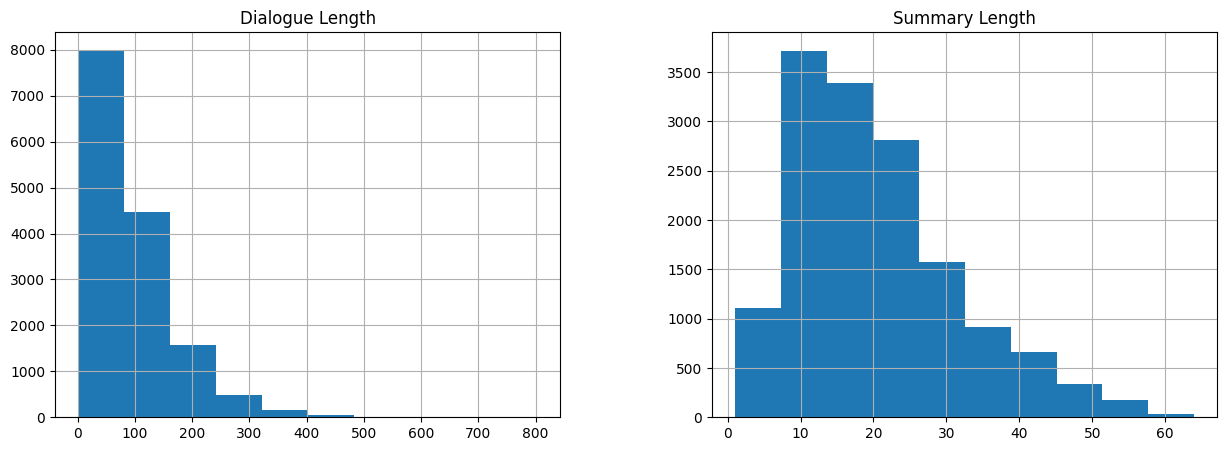

In [24]:
import pandas as pd

data = pd.DataFrame([dialogue_len, summary_len]).T
data.columns = ['Dialogue Length', 'Summary Length']

data.hist(figsize=(15,5))

In [25]:
# lets build Data Collator

def get_feature(batch):
  encodings = tokenizer(batch['dialogue'], text_target=batch['summary'],
                        max_length=1024, truncation=True)
  encodings = {'input_ids': encodings['input_ids'],
               'attention_mask': encodings['attention_mask'],
               'labels': encodings['labels'],
               }
  return encodings

In [26]:
samsum_pt = samsum.map(get_feature, batched=True)
samsum_pt

Map:   0%|          | 0/14732 [00:00<?, ? examples/s]

Map:   0%|          | 0/819 [00:00<?, ? examples/s]

Map:   0%|          | 0/818 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['id', 'dialogue', 'summary', 'input_ids', 'attention_mask', 'labels'],
        num_rows: 14732
    })
    test: Dataset({
        features: ['id', 'dialogue', 'summary', 'input_ids', 'attention_mask', 'labels'],
        num_rows: 819
    })
    validation: Dataset({
        features: ['id', 'dialogue', 'summary', 'input_ids', 'attention_mask', 'labels'],
        num_rows: 818
    })
})

In [27]:
columns = ['input_ids', 'labels', 'attention_mask']
samsum_pt.set_format(type='torch', columns=columns)

In [28]:
samsum.set_format(type='pandas')
# create the dataframe
df = samsum['train'][:]
df

,id,dialogue,summary
0,13818513,Amanda: I baked cookies. Do you want some?\r\...,Amanda baked cookies and will bring Jerry some...
1,13728867,Olivia: Who are you voting for in this electio...,Olivia and Olivier are voting for liberals in ...
2,13681000,"Tim: Hi, what's up?\r\nKim: Bad mood tbh, I wa...",Kim may try the pomodoro technique recommended...
3,13730747,"Edward: Rachel, I think I'm in ove with Bella....",Edward thinks he is in love with Bella. Rachel...
4,13728094,Sam: hey overheard rick say something\r\nSam:...,"Sam is confused, because he overheard Rick com..."
...,...,...,...
14727,13863028,Romeo: You are on my ‘People you may know’ lis...,Romeo is trying to get Greta to add him to her...
14728,13828570,Theresa: <file_photo>\r\nTheresa: <file_photo>...,Theresa is at work. She gets free food and fre...
14729,13819050,John: Every day some bad news. Japan will hunt...,Japan is going to hunt whales again. Island an...
14730,13828395,Jennifer: Dear Celia! How are you doing?\r\nJe...,Celia couldn't make it to the afternoon with t...


In [29]:
#Data collator that will dynamically pad the inputs received, as well as the labels.
from transformers import DataCollatorForSeq2Seq

data_collator = DataCollatorForSeq2Seq(tokenizer, model=model)

In [30]:
from transformers import TrainingArguments, Trainer

training_args = TrainingArguments(
                                output_dir = 'bart_samsum',
                                num_train_epochs=1,
                                warmup_steps = 500,
                                per_device_train_batch_size=4,
                                per_device_eval_batch_size=4,
                                weight_decay = 0.01,
                                logging_steps = 10,
                                evaluation_strategy = 'steps',
                                eval_steps=500,
                                save_steps=1e6,
                                gradient_accumulation_steps=16,
                                )

trainer = Trainer(model=model,
                  args=training_args,
                  tokenizer=tokenizer,
                  data_collator=data_collator,
                  train_dataset = samsum_pt['train'],
                  eval_dataset = samsum_pt['validation']
                  )

In [ ]:
#takes 30 min
trainer.train()

Step,Training Loss,Validation Loss


KeyboardInterrupt: 

In [ ]:
trainer.save_model('bart_samsum_model')

In [ ]:
# custome Dialogue Prediction

pipe = pipeline('summarization', model='bart_samsum_model')
gen_kwargs = {'length_penalty': 0.8, 'num_beams': 8, "max_length": 128}

custom_dialogue="""
Daniele: what work you planning to give Tom?
Laura: i was hoping to send him on a business trip first.
Daniele: cool. is there any suitable work for him?
Laura: he did excellent in last quarter. i will assign new project, once he is back.
"""
print(pipe(custom_dialogue, **gen_kwargs))

Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.
Your max_length is set to 128, but your input_length is only 68. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=34)


[{'summary_text': 'Laura: i was hoping to send him on a business trip first.Daniele: cool. is there any suitable work for him?Laura: he did excellent in last quarter. i will assign new project, once he is back. Daniele asks: what work you planning to give Tom?'}]


In [ ]:
!zip bart_samsum.zip -r bart_samsum_model/

  adding: bart_samsum_model/ (stored 0%)
  adding: bart_samsum_model/config.json (deflated 61%)
  adding: bart_samsum_model/tokenizer.json (deflated 72%)
  adding: bart_samsum_model/special_tokens_map.json (deflated 52%)
  adding: bart_samsum_model/generation_config.json (deflated 47%)
  adding: bart_samsum_model/vocab.json (deflated 59%)
  adding: bart_samsum_model/merges.txt (deflated 53%)
  adding: bart_samsum_model/tokenizer_config.json (deflated 76%)
  adding: bart_samsum_model/training_args.bin (deflated 51%)
  adding: bart_samsum_model/model.safetensors (deflated 7%)
